In [16]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from pathlib import Path

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('D:/workspace/20.template_matching/img/lize_00811_0.png')
temp = cv2.imread('D:/workspace/20.template_matching/img/template.png')

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

In [47]:
## ZNCC
match = cv2.matchTemplate(img_gray, temp_gray, cv2.TM_CCORR_NORMED)


In [48]:
min_value, max_value, pt_min, pt_max = cv2.minMaxLoc(match)

0.9946214556694031


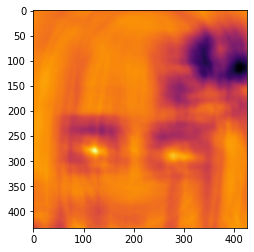

In [49]:
plt.imshow(match,cmap='inferno')
print(max_value)

In [50]:
img_list = list(Path('D:/workspace/20.template_matching/img/augumentation').glob('*.png'))

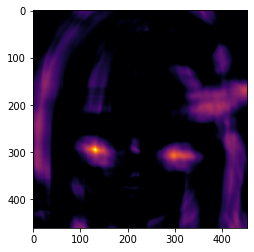

0.9967396855354309 (131, 295)


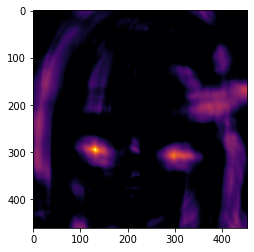

0.9982379078865051 (131, 295)


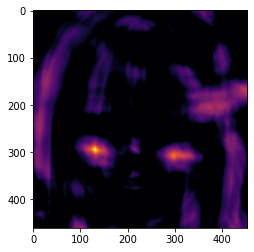

0.9985213279724121 (131, 295)


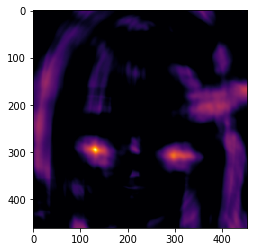

0.9998670220375061 (131, 295)


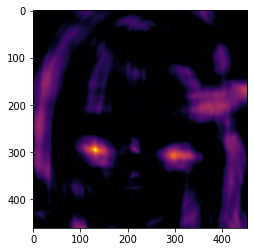

0.9999668598175049 (131, 295)


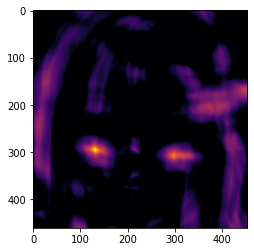

0.999826192855835 (131, 295)


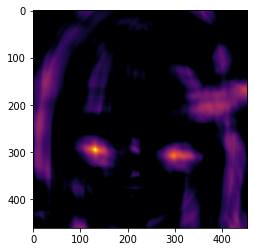

0.998386561870575 (131, 295)


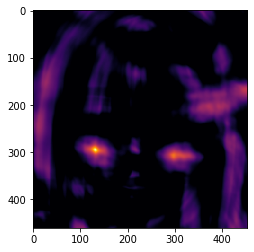

0.9988234043121338 (131, 295)


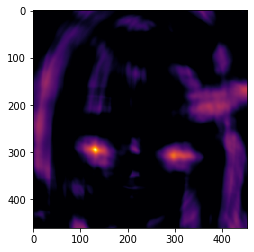

0.9991815686225891 (131, 295)


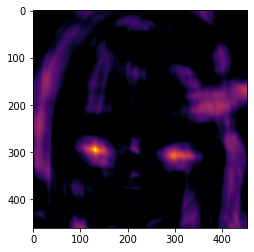

0.9999276399612427 (131, 295)


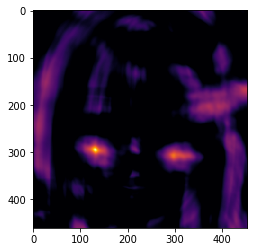

0.9998692274093628 (131, 295)


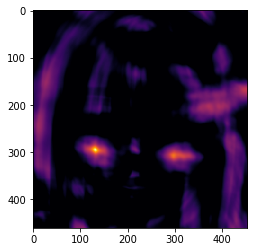

0.9994452595710754 (131, 295)


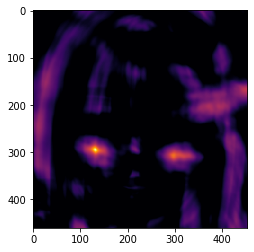

0.9986022710800171 (131, 295)


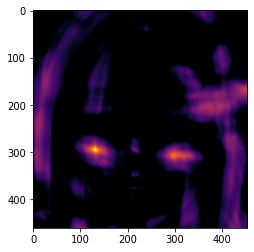

0.9949371814727783 (131, 295)


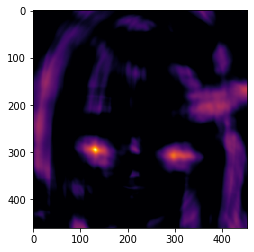

0.9996877312660217 (131, 295)


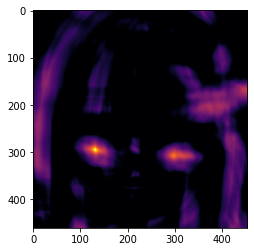

0.9977832436561584 (131, 295)


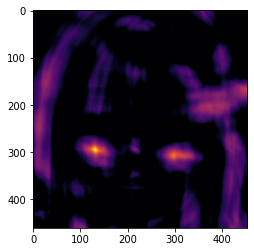

0.9986469149589539 (131, 295)


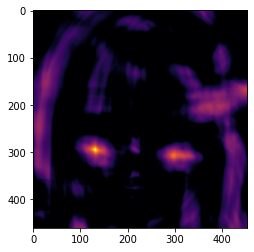

0.9995213150978088 (131, 295)


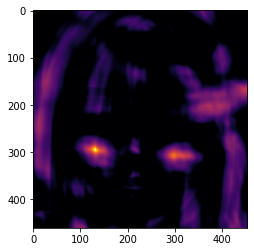

0.9993967413902283 (131, 295)


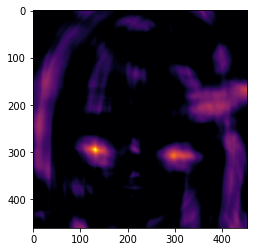

0.9992145895957947 (131, 295)


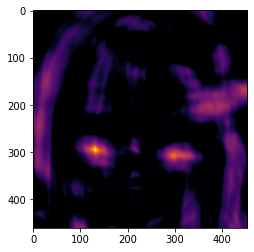

0.9987859129905701 (131, 295)


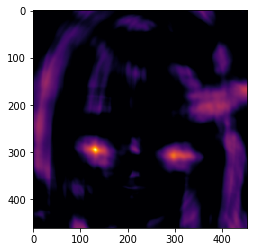

0.9998158812522888 (131, 295)


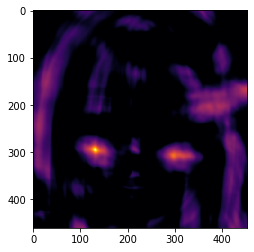

0.9998229742050171 (131, 295)


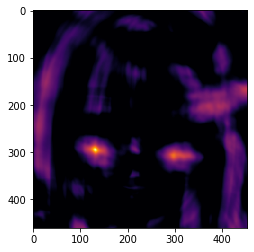

0.9988869428634644 (131, 295)


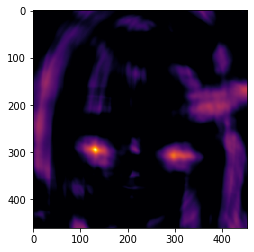

0.9998347163200378 (131, 295)


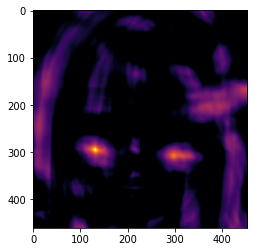

0.9990615248680115 (131, 295)


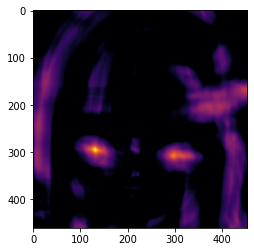

0.9963827729225159 (131, 295)


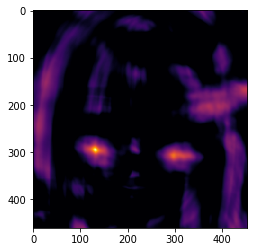

0.9992961883544922 (131, 295)


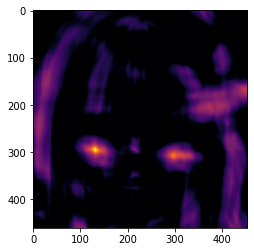

0.9998833537101746 (131, 295)


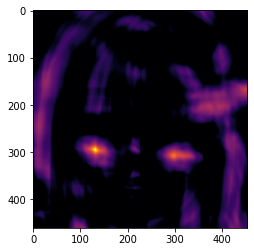

0.9999752044677734 (131, 295)


In [63]:
for img_name in img_list:
    img = cv2.imread(str(img_name))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    match = cv2.matchTemplate(img_gray, temp_gray, cv2.TM_CCOEFF_NORMED)
    min_value, max_value, pt_min, pt_max = cv2.minMaxLoc(match)
    # plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.imshow(match,cmap='inferno',vmin=0,vmax=1)
    plt.show()
    print(max_value, pt_max)

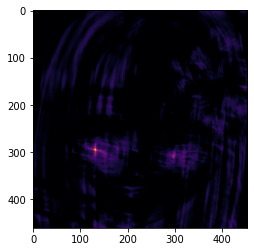

0.9879372715950012 (131, 295)


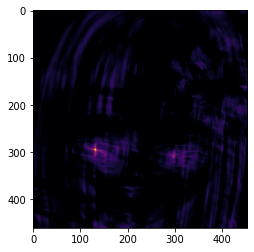

0.9934778213500977 (131, 295)


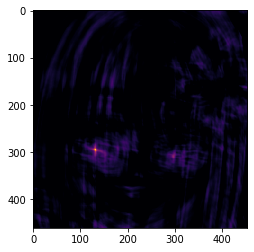

0.9919034242630005 (131, 295)


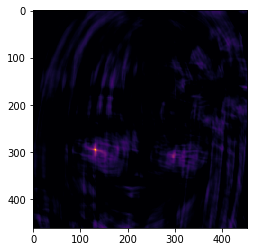

0.9988582134246826 (131, 295)


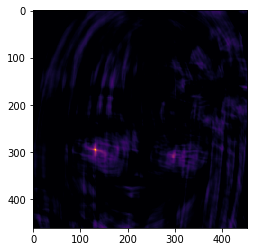

0.9992220997810364 (131, 295)


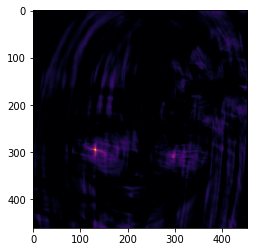

0.9986494779586792 (131, 295)


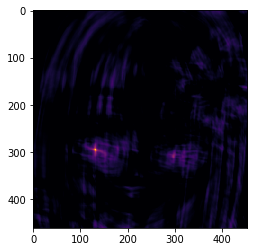

0.9927943348884583 (131, 295)


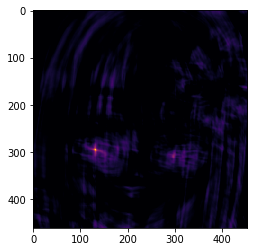

0.9932193756103516 (131, 295)


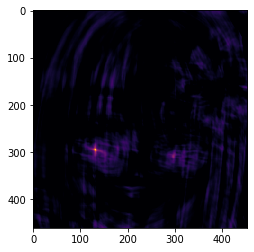

0.9948471784591675 (131, 295)


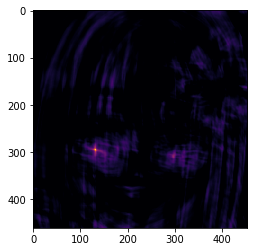

0.9989699721336365 (131, 295)


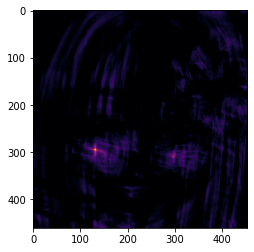

0.9988479614257812 (131, 295)


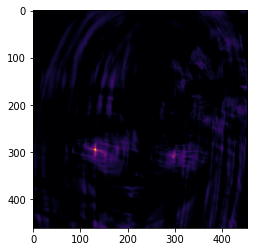

0.997315526008606 (131, 295)


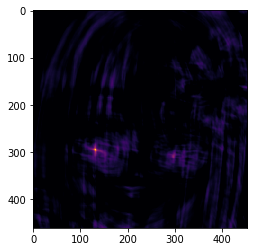

0.9924076199531555 (131, 295)


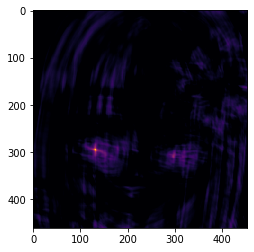

0.980552613735199 (131, 295)


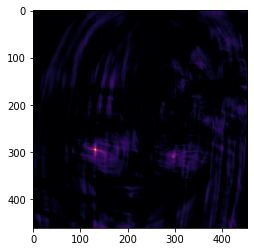

0.9975334405899048 (131, 295)


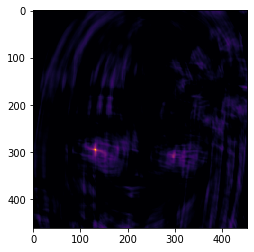

0.9918973445892334 (131, 295)


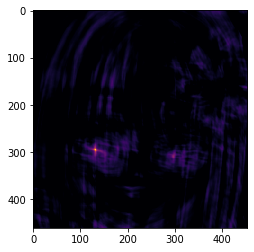

0.9923141002655029 (131, 295)


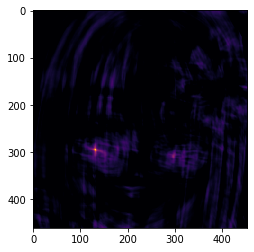

0.996703565120697 (131, 295)


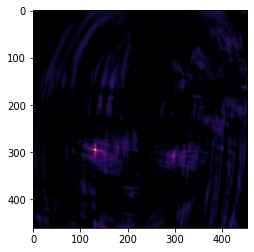

0.9967589378356934 (131, 295)


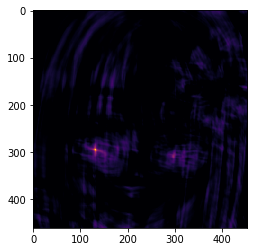

0.9954929351806641 (131, 295)


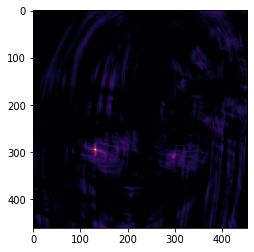

0.9931237697601318 (131, 295)


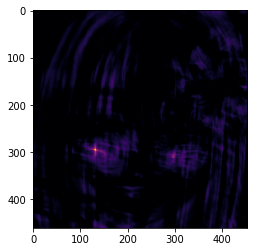

0.9981704354286194 (131, 295)


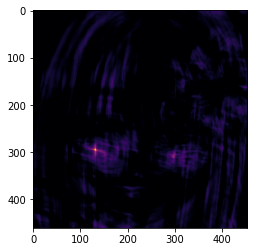

0.9984261393547058 (131, 295)


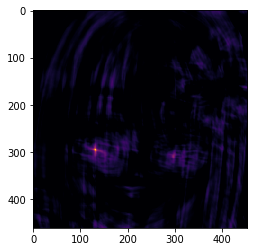

0.9930965304374695 (131, 295)


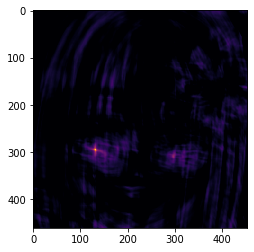

0.9988406896591187 (131, 295)


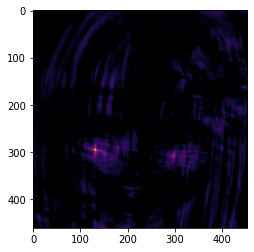

0.995368480682373 (131, 295)


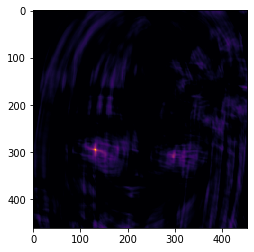

0.986095130443573 (131, 295)


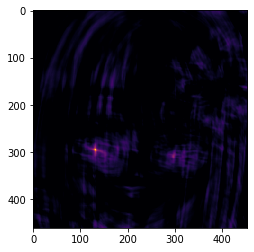

0.9956894516944885 (131, 295)


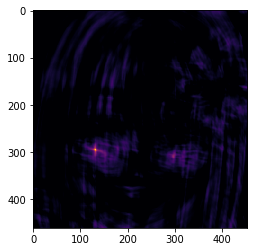

0.9988465905189514 (131, 295)


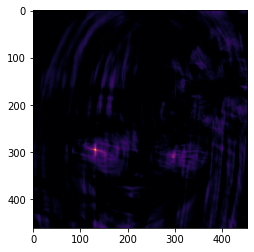

0.9992498755455017 (131, 295)


In [65]:
for img_name in img_list:
    img = cv2.imread(str(img_name))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_edge = np.sqrt(cv2.Sobel(img_gray,cv2.CV_32F,1,0,ksize=5)**2 + cv2.Sobel(img_gray,cv2.CV_32F,0,1,ksize=5)**2)
    temp_edge = np.sqrt(cv2.Sobel(temp_gray,cv2.CV_32F,1,0,ksize=5)**2 + cv2.Sobel(temp_gray,cv2.CV_32F,0,1,ksize=5)**2)
    # temp_edge = cv2.GaussianBlur(temp_edge,(11,11),0)

    match = cv2.matchTemplate(img_edge, temp_edge, cv2.TM_CCOEFF_NORMED)
    min_value, max_value, pt_min, pt_max = cv2.minMaxLoc(match)
    # plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.imshow(match,cmap='inferno',vmin=0,vmax=1)
    plt.show()
    print(max_value, pt_max)

In [83]:
def matchTempEdge(img,temp):
    if len(img.shape) != 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if len(temp.shape) != 2:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

    img_edge = np.sqrt(cv2.Sobel(img,cv2.CV_32F,1,0,ksize=5)**2 + cv2.Sobel(img,cv2.CV_32F,0,1,ksize=5)**2)
    temp_edge = np.sqrt(cv2.Sobel(temp,cv2.CV_32F,1,0,ksize=5)**2 + cv2.Sobel(temp,cv2.CV_32F,0,1,ksize=5)**2)
    temp_edge = cv2.GaussianBlur(temp_edge,(11,11),0)

    match = cv2.matchTemplate(img_edge, temp_edge, cv2.TM_CCOEFF_NORMED)

    return match

In [84]:
## Pramid Scale
malti_match = []
for i in range(3):
    scale = (1/2)**(2-i)
    resize_img_shape = (int(img_gray.shape[0]*scale), int(img_gray.shape[1]*scale))
    resize_temp_shape = (int(temp_gray.shape[0]*scale), int(temp_gray.shape[1]*scale))

    resize_img = cv2.resize(img_gray, resize_img_shape)
    resize_temp = cv2.resize(temp_gray, resize_temp_shape)

    match = matchTempEdge(resize_img, resize_temp)
    malti_match.append(match)

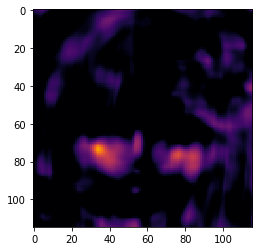

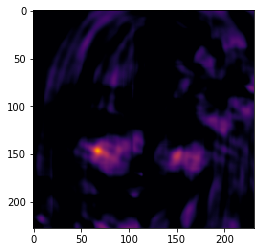

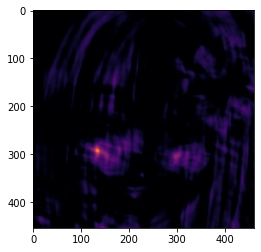

In [85]:
for match in malti_match:
    plt.imshow(match,cmap='inferno',vmin=0,vmax=1)
    plt.show()